In [1]:
import itertools
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.distributions as D
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
global  samplesJoint,tp_dataloader,tp_dataloader_testing,dp,decision,dp_H,decision_H
n = 5
epochs = 3
supervisionEpochs = 2
lr = 0.001
log_interval = 50
trainSize = 5000#100000
penaltyLambda = 10
doublePeakHighMean = 0.9
doublePeakLowMean = 0.1
doublePeakStd = 0.1
uniformlow=0
uniformhigh=1.0
normalloc = 0.2
normalscale = 0.1

independentnormalloc=[(float(ii))/(2*n+1) for ii in range(n,0,-1)]
independentnormalscale=[0.05 for ii in range(n)]
stage=["twopeak","normal","uniform","independent"]

order1name=["costsharing","dp","heuristic","random initializing"]


In [2]:
d1 = D.normal.Normal(doublePeakLowMean, doublePeakStd)
d2 = D.normal.Normal(doublePeakHighMean, doublePeakStd)
distributionRatio = (d1.cdf(1) + d2.cdf(1) - d1.cdf(0) - d2.cdf(0)) / 2
distributionBase = d1.cdf(0) + d2.cdf(0)

d3 = D.normal.Normal(normalloc, normalscale)
d4 = D.uniform.Uniform(uniformlow,uniformhigh)

d5 = [D.normal.Normal(independentnormalloc[ii], independentnormalscale[ii]) for ii in range(n)]

d6 = D.half_cauchy.HalfCauchy(0.25)

d7 = D.exponential.Exponential(15)

d9 = D.half_normal.HalfNormal(0.5)
def cdf(x,y, i=None):
    if(y=="twopeak"):
        return (d1.cdf(x) + d2.cdf(x) - distributionBase) / 2 / distributionRatio
    elif(y=="normal"):
        return d3.cdf(x);
    elif(y=="uniform"):
        return d4.cdf(x);
    elif(y=="independent"):
        return d5[i].cdf(x);
#print(cdf(0.1,"independent",1))

In [3]:
t = d7.rsample(torch.Size([100000]))
print(t)

tensor([0.0418, 0.0564, 0.1270,  ..., 0.0338, 0.1661, 0.0821])


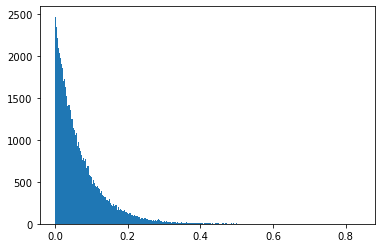

In [4]:
plt.hist(t,bins=500)
plt.show()

In [5]:
t1 = d9.rsample(torch.Size([100000]))
print(t)

tensor([0.0418, 0.0564, 0.1270,  ..., 0.0338, 0.1661, 0.0821])


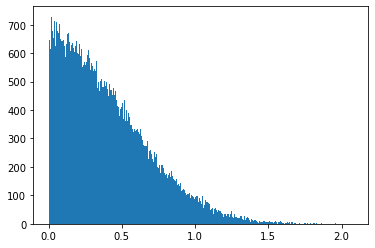

In [6]:
plt.hist(t1,bins=500)
plt.show()